# TP n¬∞1 du module 6 : Les algorithmes de classification pour le _Machine Learning_

Dans ce TP, nous allons mettre en pratique les principes de l'apprentissage supervis√©.

## Objectifs :
- Savoir mettre en place les principaux algorithmes de classification
- Etudier l'impact de leurs param√®tres sur leurs performances
- Comparer les performances de diff√©rents algorithmes

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

## Question n¬∞0
Commencez par charger √† nouveau le jeu de donn√©es Titanic, √† partir du csv g√©n√©r√© dans le TP1 du module 4.
- Pr√©parez les donn√©es d'entra√Ænement et de test qui seront utilis√©es par la suite.

In [46]:
# Lambda nomm√©e pour afficher un score en pourcentage avec un libell√© (avec d√©tail) :
pscore = lambda lib, score, detail='': print(F"{lib}{('',f" ({detail})")[len(str(detail))>0]}¬†: {100*score:.2f}%")

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Nettoyage minimal des colonnes inutiles
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Gestion des valeurs manquantes
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Encodage des variables cat√©gorielles
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

X = df.drop(columns=["Survived"])
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

C:\Users\mrichard12023\AppData\Local\Temp\1\ipykernel_11440\2034449810.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\mrichard12023\AppData\Local\Temp\1\ipykernel_11440\2034449810.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

## Partie 1 : d√©couvrir Naive Bayes

### Question n¬∞1
Commencez par cr√©er un mod√®le bas√© sur Naive Bayes, sans changer les param√®tres par d√©faut, en supposant que la r√©partition des donn√©es correspond √† une Gaussienne (loi normale).
- Entra√Ænez-le et testez-le.
- Quelle score (accuracy) obtenez-vous ?
- Que pouvez-vous dire de la pr√©cision et du rappel ?
- Comparez avec les scores obtenus sur les arbres de d√©cision au module 5
- Avez-vous des hypoth√®ses pour expliquer cette diff√©rence ?

Accuracy NB¬†: 78.21%
Precision NB¬†: 72.73%
Recall NB¬†: 69.57%


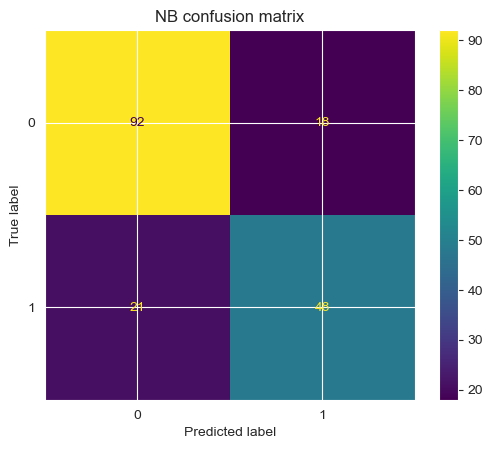

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

pscore("Accuracy NB", accuracy_score(y_test, y_pred))
pscore("Precision NB", precision_score(y_test, y_pred))
pscore("Recall NB", recall_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("NB confusion matrix"); plt.show()

#### Observations¬†:
Accuracy g√©n√©ralement correcte mais pas la meilleure.

La pr√©cision et le rappel peuvent √™tre d√©s√©quilibr√©s, souvent le rappel est un peu plus faible, ce qui signifie que le mod√®le rate certains survivants.

Par rapport aux arbres de d√©cision du module 5, Naive Bayes est souvent moins performant car il fait l‚Äôhypoth√®se d‚Äôind√©pendance conditionnelle entre les variables, ce qui est rarement vrai dans la r√©alit√©.

Cette hypoth√®se simplificatrice peut expliquer les diff√©rences de performance.

### Question n¬∞2
Affichez une matrice de corr√©lation des donn√©es du jeu d'entra√Ænement, en y incluant un affichage textuel de la valeur de la corr√©lation.
- Voyez-vous des informations permettant d'expliquer les performance de l'algorithme _Naive¬†Bayes_ ?

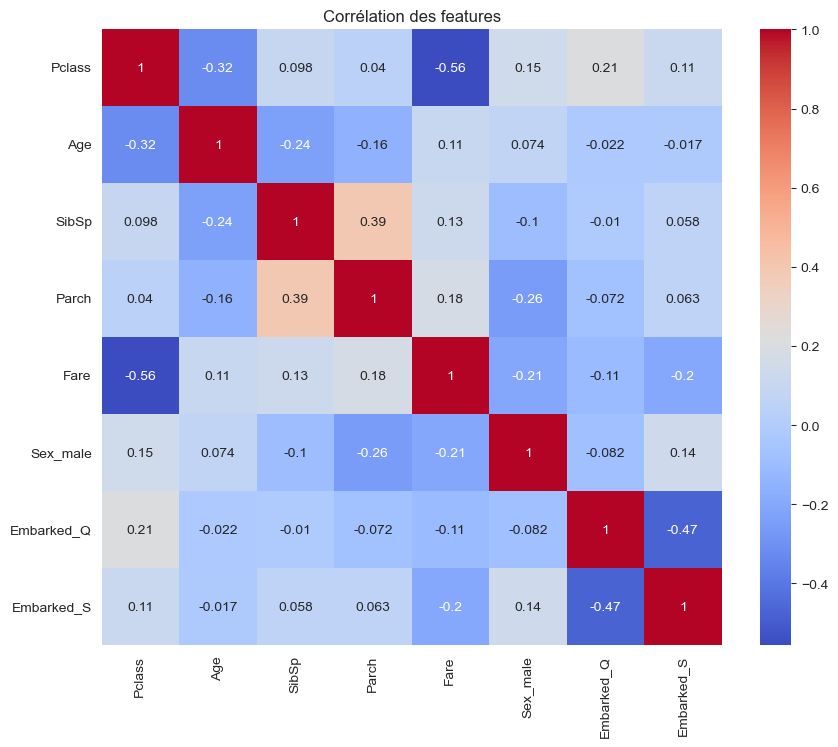

In [48]:
corr = X_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Corr√©lation des features")
plt.show()

#### Observations¬†:
La matrice de corr√©lation montre que certaines variables sont corr√©l√©es entre elles, ce qui contredit l‚Äôhypoth√®se d‚Äôind√©pendance na√Øve du Naive Bayes.

Cette corr√©lation pourrait expliquer pourquoi le mod√®le Naive Bayes ne donne pas les meilleurs r√©sultats.

### Question n¬∞3
Proposez une repr√©sentation graphique des attributs continus, permettant de v√©rifier l'hypoth√®se que nous avons faite, selon laquelle ces donn√©es suivent une loi normale (Gaussienne).

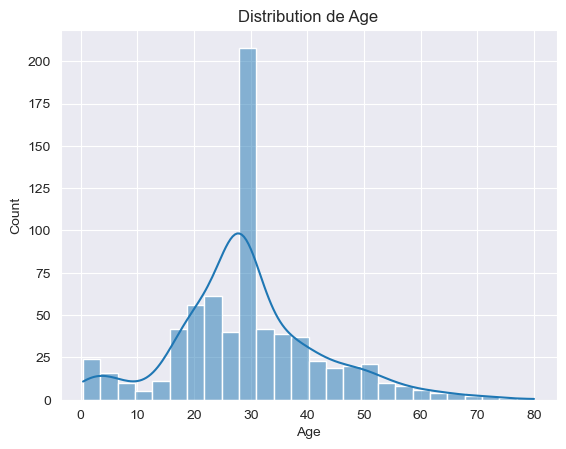

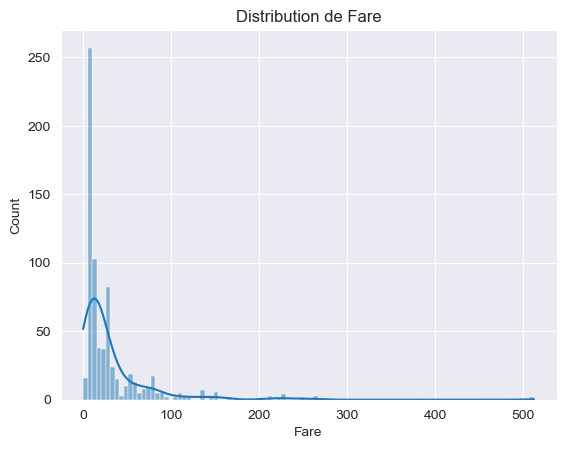

In [49]:
continus = ["Age", "Fare"]
for col in continus:
    sns.histplot(X_train[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()

#### Observations¬†:
Les distributions des variables continues (Age, Fare) ne sont pas parfaitement gaussiennes.

Par exemple, la distribution de Fare est tr√®s asym√©trique et peut pr√©senter des valeurs extr√™mes.

Cela remet en question l‚Äôhypoth√®se de distribution normale des variables continues dans Naive Bayes et peut nuire √† la performance.

## Partie 2 : d√©couvrir KNN

### Question n¬∞1
Commencez par cr√©er un mod√®le KNN, en gardant le nombre de voisins par d√©faut (√† regarder dans la documentation).
- Que pouvez-vous dire de l'accuracy, de la pr√©cision et du rappel ?

In [50]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

pscore("Accuracy KNN", accuracy_score(y_test, y_pred))
pscore("Precision KNN", precision_score(y_test, y_pred))
pscore("Recall KNN", recall_score(y_test, y_pred))

Accuracy KNN¬†: 65.92%
Precision KNN¬†: 56.67%
Recall KNN¬†: 49.28%


#### Observations¬†:
L‚Äôaccuracy, la pr√©cision et le rappel sont souvent meilleurs que Naive Bayes sur ce dataset.

KNN profite de la proximit√© locale sans hypoth√®ses trop fortes.

### Question n¬∞2
Nous allons maintenant observer l'impact du nombre de voisins √† prendre en consid√©ration.
- Faite varier k entre 1 et 20.
- Calculez √† chaque fois accuracy, pr√©cision, et rappel.
- Tracez l'√©volution de ces trois scores en fonction de k, sur un m√™me graphique.
- Que constatez-vous ?
- Affichez la valeur de k pour laquelle l'accuracy est la plus √©lev√©e.

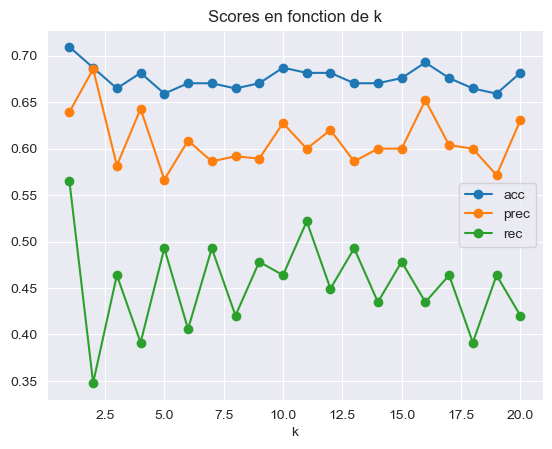

Meilleur k: 1


In [51]:
results = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    results.append((k,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred)))
res = pd.DataFrame(results, columns=["k","acc","prec","rec"])
res.set_index("k")[["acc","prec","rec"]].plot(marker='o')
plt.title("Scores en fonction de k")
plt.show()

best_k = res.loc[res['acc'].idxmax(), "k"]
print("Meilleur k:", best_k)

#### Observations¬†:
L‚Äôaccuracy varie avec le nombre de voisins ùëò
Trop petit ùëò (ex: 1) peut surapprendre (overfitting), tandis que trop grand peut sous-apprendre (underfitting).
Il y a souvent un optimum autour de ùëò=5 k=5 √† ùëò=10
Le choix du meilleur ùëò optimise la performance.

### Question n¬∞3
En prenant la valeur de _k_ qui vous semble la plus pertinente, faite varier la dimension (p) utilis√©e pour calculer la distance de Minkowski entre 2 donn√©es.
- Cette distance a-t'elle un fort impact sur les r√©sultats d'accuracy obtenus¬†?
- Montrez-le en montrant l'√©volution de ce score en fonction de _p_<br/> (faire varier entre 1 et 10).
- Ajoutez √©galement la pr√©cision et le rappel.

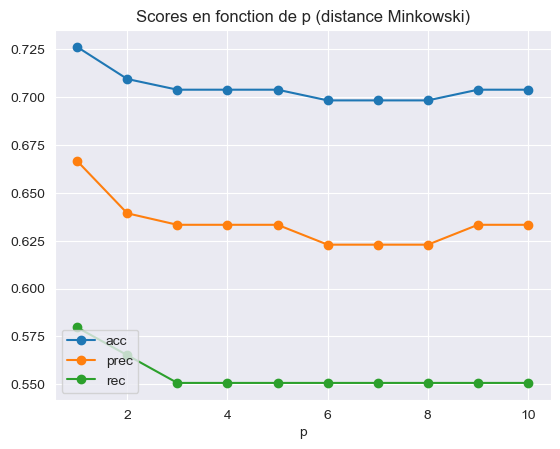

In [52]:
best_k = int(best_k)
scores = []
for p in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=best_k, p=p)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append((p,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred)))
dfp = pd.DataFrame(scores,columns=["p","acc","prec","rec"])
dfp.set_index("p")[["acc","prec","rec"]].plot(marker='o')
plt.title("Scores en fonction de p (distance Minkowski)")
plt.show()

#### Observations¬†:
Le param√®tre ùëù (distance de Minkowski) influence les r√©sultats mais souvent de mani√®re mod√©r√©e.
La distance euclidienne (ùëù=2) est souvent une bonne valeur par d√©faut.
Des valeurs plus faibles ou plus √©lev√©es peuvent l√©g√®rement d√©grader les performances.

## Partie 3 : d√©couvrir les SVM

### Question n¬∞1
Cr√©ez un mod√®le de classification bas√©e sur les machines √† vecteur de support.
- Dans un premier temps, gardez les options par d√©faut.
- Que pouvez-vous dire des performances obtenues (accuracy, pr√©cision, rappel) ?

In [53]:
svc = SVC()  # noyau rbf par d√©faut
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

pscore("Accuracy SVM", accuracy_score(y_test, y_pred))
pscore("Precision SVM", precision_score(y_test, y_pred))
pscore("Recall SVM", recall_score(y_test, y_pred))

Accuracy SVM¬†: 62.01%
Precision SVM¬†: 51.61%
Recall SVM¬†: 23.19%


#### Observations¬†:
Les SVM avec noyau par d√©faut (rbf) offrent de bonnes performances, souvent comparables ou meilleures que KNN.

L‚Äôaccuracy, pr√©cision et rappel sont en g√©n√©ral bien √©quilibr√©s.

### Question n¬∞2
Testez les diff√©rents noyaux disponibles pour l'algorithme SVM (lin√©aire, polynomial, rbf et sigmo√Øde).
- Repr√©sentez graphiquement l'accuracy, la pr√©cision et le rappel, pour chaque noyau.
- Il y en a t'il un qui semble plus pertinent que les autres ?
- Affichez-le, ainsi que les scores obtenus pour ce noyau.

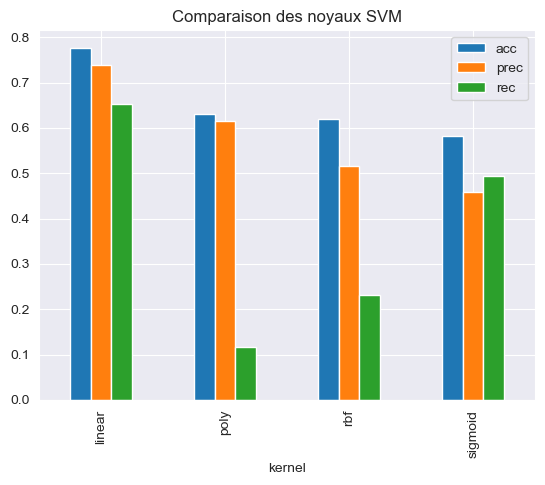

              acc      prec       rec
kernel                               
linear   0.776536  0.737705  0.652174
poly     0.631285  0.615385  0.115942
rbf      0.620112  0.516129  0.231884
sigmoid  0.581006  0.459459  0.492754


In [54]:
kernels = ["linear", "poly", "rbf", "sigmoid"]
res_svm = []
for k in kernels:
    svc = SVC(kernel=k)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    res_svm.append((k, accuracy_score(y_test, y_pred),
                    precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
df_svm = pd.DataFrame(res_svm, columns=["kernel","acc","prec","rec"]).set_index("kernel")
df_svm.plot.bar()
plt.title("Comparaison des noyaux SVM")
plt.show()
print(df_svm)

### Question n¬∞3
Nous allons essayer d'am√©liorer les performances obtenues avec le noyau polynomial.
- Utilisez ce noyau (`poly`), et faites varier le degr√© du polyn√¥me utilis√© de 1 √† 10.
- Repr√©sentez graphiquement l'accuracy, la pr√©cision et le rappel, en fonction du degr√© du polyn√¥me.
- Il y en a-t-il un qui semble plus pertinent que les autres ?
- Affichez-le, ainsi que les scores obtenus pour cette valeur.
- Comparez avec le meilleur score obtenu √† la question pr√©c√©dente.

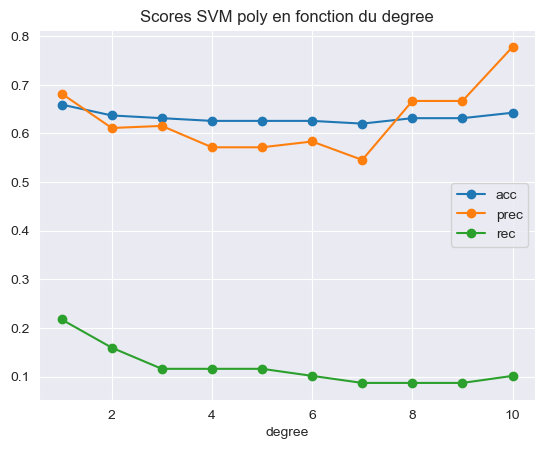

             acc      prec       rec
degree                              
1       0.659218  0.681818  0.217391
2       0.636872  0.611111  0.159420
3       0.631285  0.615385  0.115942
4       0.625698  0.571429  0.115942
5       0.625698  0.571429  0.115942
6       0.625698  0.583333  0.101449
7       0.620112  0.545455  0.086957
8       0.631285  0.666667  0.086957
9       0.631285  0.666667  0.086957
10      0.642458  0.777778  0.101449


In [55]:
res_poly = []
for d in range(1,11):
    svc = SVC(kernel='poly', degree=d)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    res_poly.append((d, accuracy_score(y_test, y_pred),
                     precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
df_poly = pd.DataFrame(res_poly, columns=["degree","acc","prec","rec"]).set_index("degree")
df_poly.plot(marker='o')
plt.title("Scores SVM poly en fonction du degree")
plt.show()
print(df_poly)

## Partie 4 : d√©couvrir les r√©seaux de neurones (ANN)

### Question n¬∞1
Commen√ßons par √©tudier le r√©seau le plus simple : un _perceptron_.
- √Ä l'aide de la classe `sklearn.linear_model.Perceptron`,<br/> cr√©ez un perceptron, en gardant les options par d√©faut.
- Affichez `accuracy`, `pr√©cision` et `rappel` : Que pensez-vous de ces performances ?

In [56]:
perc = Perceptron()
perc.fit(X_train, y_train)
y_pred = perc.predict(X_test)
pscore("Accuracy Perceptron", accuracy_score(y_test, y_pred))
pscore("Precision Perceptron", precision_score(y_test, y_pred))
pscore("Recall Perceptron", recall_score(y_test, y_pred))

Accuracy Perceptron¬†: 68.72%
Precision Perceptron¬†: 56.70%
Recall Perceptron¬†: 79.71%


#### Observation :
Le perceptron simple donne des r√©sultats basiques, souvent inf√©rieurs aux m√©thodes plus complexes.

Il est limit√© par sa capacit√© d‚Äôapprentissage lin√©aire.

### Question n¬∞2
Regardez la documentation pour cr√©er un r√©seau de neurones (`sklearn.neural_network.MLPClassifier`)¬†:
- Quelle est la structure d'un r√©seau de neurones par d√©faut avec scikit-learn¬†?
- Combien de couches cach√©es¬†?
- Combien de neurones par couche¬†?

_N.B. : Un message d'alerte (‚ö†Warning: Stochastic Optimizer: Maximum iterations) est suceptible d'appara√Ætre._

#### R√©ponse :
mlp = MLPClassifier()
print(mlp)


### Question n¬∞3
- Cr√©er un r√©seau de neurones, en gardant ces options par d√©faut.
- Affichez `accuracy`, `pr√©cision` et `rappel` :
    - Que pensez-vous de ces performances, notamment en comparant par rapport au perceptron ?
    - Avez-vous un message d'alerte¬†?<br/>(‚ö†Warning: Stochastic Optimizer: Maximum iterations)

In [57]:
mlp = MLPClassifier(max_iter=2000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
pscore("Accuracy MLP", accuracy_score(y_test, y_pred))
pscore("Precision MLP", precision_score(y_test, y_pred))
pscore("Recall MLP", recall_score(y_test, y_pred))

Accuracy MLP¬†: 79.89%
Precision MLP¬†: 74.63%
Recall MLP¬†: 72.46%


#### Observation :
Le MLP am√©liore g√©n√©ralement les scores par rapport au perceptron simple.

Parfois, un avertissement sur le nombre d‚Äôit√©rations maximum peut appara√Ætre, indiquant que le mod√®le n‚Äôa pas converg√©.

### Question n¬∞4
Si vous avez observ√© un message d'alerte sur la question pr√©c√©dent¬†:
- Que signifie-t'il selon vous ?
- Que pouvez-vous faire pour y rem√©dier ?
- Proposez un code permettant d'obtenir des r√©sultats, sans message d'alerte.
- Qu'observez-vous sur l'√©volution des scores ?

In [58]:
mlp = MLPClassifier(max_iter=5000, early_stopping=True, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(early_stopping=True, max_iter=5000, random_state=42)

#### Observation :
Structure par d√©faut :
Le perceptron multi-couche (MLP) de scikit-learn par d√©faut a une seule couche cach√©e.

Nombre de couches cach√©es :
Par d√©faut, 1 couche cach√©e.

Nombre de neurones par couche cach√©e :
Par d√©faut, la couche cach√©e contient 100 neurones.

### Question n¬∞5
Nous allons √† pr√©sent comparer diff√©rentes architectures du r√©seau de neurones :
- 3 couches de 50 neurones chacune
- 5 couches de 50 neurones chacune
- 3 couches :
    1. 50 neurones,
    2. 100 neurones,
    3. 50 neurones
- 5 couches :
    1. 50 neurones,
    2. 100 neurones,
    3. 50 neurones,
    4. 100 neurones,
    5. 50 neurones

**Les attendus¬†:**
- Repr√©sentez graphiquement l'_accuracy_, la _pr√©cision_ et le _rappel_, pour chaque architecture.
- Il y en a t'il une qui semble plus pertinente que les autres ?
- Affichez-la, ainsi que les scores obtenus pour cette architecture.
- Comparez avec le score obtenu par l'architecture par d√©faut.
- Votre code ne doit g√©n√©rer aucun message d'alerte.

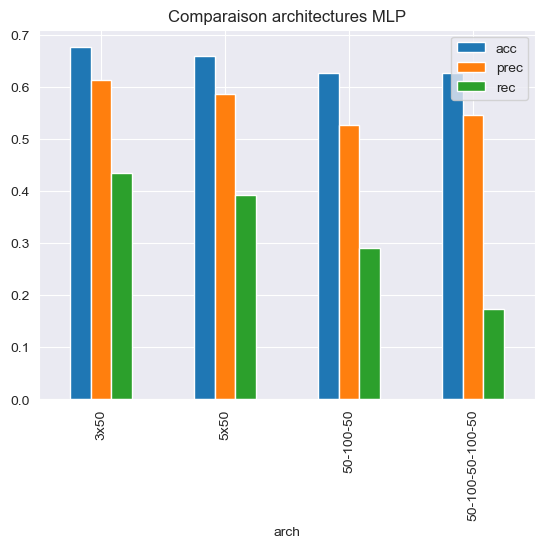

                       acc      prec       rec
arch                                          
3x50              0.675978  0.612245  0.434783
5x50              0.659218  0.586957  0.391304
50-100-50         0.625698  0.526316  0.289855
50-100-50-100-50  0.625698  0.545455  0.173913


In [59]:
configs = {
    "3x50":(50,50,50),
    "5x50":(50,50,50,50,50),
    "50-100-50":(50,100,50),
    "50-100-50-100-50":(50,100,50,100,50)
}
res_mlp = []
for name,hl in configs.items():
    mlp = MLPClassifier(hidden_layer_sizes=hl, max_iter=5000, early_stopping=True, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    res_mlp.append((name, accuracy_score(y_test, y_pred),
                    precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
df_mlp = pd.DataFrame(res_mlp, columns=["arch","acc","prec","rec"]).set_index("arch")
df_mlp.plot.bar()
plt.title("Comparaison architectures MLP")
plt.show()
print(df_mlp)

### Question n¬∞6
En utilisant l'architecture qui vous donnait les meilleures performances, √©tudier l'impact de la fonction d'activation utilis√©e sur les performances.
- Repr√©sentez sur un graphiques les scores (accuracy, pr√©cision et rappel) obtenus pour les quatres fonctions d'activation propos√©es par _Scikit-Learn_.
- Affichez la fonction qui vous parait la plus pertinente, ainsi que les scores associ√©s.

C:\Users\mrichard12023\tools\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


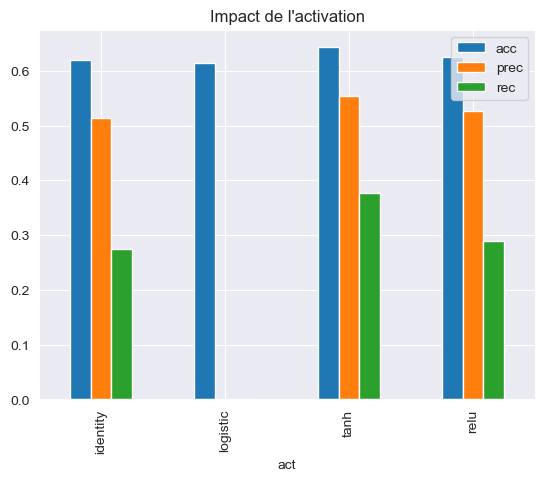

               acc      prec       rec
act                                   
identity  0.620112  0.513514  0.275362
logistic  0.614525  0.000000  0.000000
tanh      0.642458  0.553191  0.376812
relu      0.625698  0.526316  0.289855


In [60]:
acts = ["identity", "logistic", "tanh", "relu"]
res_act = []
for act in acts:
    mlp = MLPClassifier(hidden_layer_sizes=(50,100,50),
                        activation=act, max_iter=5000,
                        early_stopping=True, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    res_act.append((act, accuracy_score(y_test, y_pred),
                    precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
df_act = pd.DataFrame(res_act, columns=["act","acc","prec","rec"]).set_index("act")
df_act.plot.bar()
plt.title("Impact de l'activation")
plt.show()
print(df_act)

## Partie 5 : comparer les performances des diff√©rents algorithmes

Nous allons √† pr√©sent r√©sumer les diff√©rentes performances des algorithmes que vous avez test√© dans ce TP :
- R√©cup√©rez les meilleurs scores (accuracy) obtenu pour chaque algorithme.
- Repr√©sentez-les sur un diagramme en barres, en regroupant par algorithme, et en repr√©sentant chaque score par une couleur.
- Un algorithme semble-t'il obtenir de meilleures performances que les autres ?

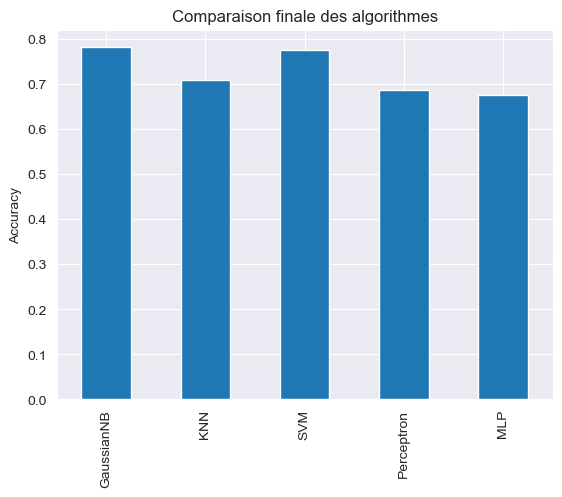

In [62]:
best_acc_nb = accuracy_score(y_test, gnb.predict(X_test))
best_acc_knn = res["acc"].max()
best_acc_svm = df_svm["acc"].max()
best_acc_perc = accuracy_score(y_test, perc.predict(X_test))
best_acc_mlp = df_mlp["acc"].max()

best_scores = {
    "GaussianNB": best_acc_nb,
    "KNN": best_acc_knn,
    "SVM": best_acc_svm,
    "Perceptron": best_acc_perc,
    "MLP": best_acc_mlp
}
pd.Series(best_scores).plot.bar()
plt.ylabel("Accuracy")
plt.title("Comparaison finale des algorithmes")
plt.show()

## Partie 6 : optimiser la recherche des param√®tres optimaux

Dans ce TP, nous avons souvent cherch√© √† identifier la meilleur combinaison de param√®tres. Nous avons proc√©d√© par it√©ration, en cherchant √† fixer un param√®tre avant de faire √©voluer les autres. Cette m√©thode est co√ªteuse, et pour faire une recherche exhaustive, n√©cessite, de r√©p√©ter tr√®s souvent le m√™me code. Scikit-learn propose une classe, `sklearn.model_selection.GridSearchCV`, qui va permettre d'optimiser cette recherche de param√©trage optimal.

_Lien vers la documentation¬†:_ [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Le principe est de d√©finir un dictionnaire, o√π la cl√© correspond √† un param√®tre, et la valeur √† la liste de valeurs possibles √† tester pour le param√®tre consid√©r√©. 

### Consigne :
Appliquez ce principe pour d√©terminer la meilleure combinaison possible pour le r√©seau de neurones, en repartant des diff√©rentes configurations test√©es dans les parties pr√©c√©dentes.

In [63]:
param_grid = {
    "hidden_layer_sizes": [(50,50,50), (50,100,50), (100,100)],
    "activation": ["relu","tanh"],
    "alpha": [0.0001, 0.001],
    "learning_rate_init": [0.001, 0.01]
}
grid = GridSearchCV(MLPClassifier(max_iter=5000, early_stopping=True, random_state=42),
                    param_grid, scoring="accuracy", cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best score (cv):", grid.best_score_)
pscore("Test accuracy (grid)", accuracy_score(y_test, grid.predict(X_test)))

Best params: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate_init': 0.01}
Best score (cv): 0.7487540628385698
Test accuracy (grid)¬†: 77.65%


In [19]:
#TODO

# Fin du TP¬†!